In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import random as rnd
import cv2

In [2]:
parent_dir = "C:\\Users\\jains\\Desktop\\aventus\\archive (1)\\Alzheimer_s Dataset"
train_dir = os.path.join(parent_dir,'train')
test_dir = os.path.join(parent_dir,'test')

In [3]:
classes = os.listdir(train_dir)

In [4]:
classes

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [49]:
def display_img():
    class_name = rnd.choice(classes)
    path = os.path.join(train_dir,class_name)
    imgs_file = os.listdir(path)
    img = cv2.imread(os.path.join(path,rnd.choice(imgs_file)))
    img = cv2.resize(img,(224,224))
    print(img.shape)
    plt.imshow(img)
    plt.title(class_name)
    

(224, 224, 3)


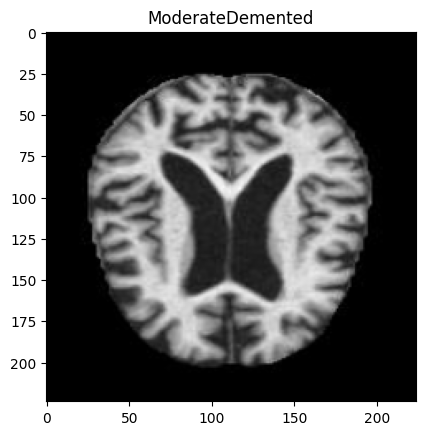

In [50]:
display_img()

In [34]:
train_data_gen = ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=50,)

In [51]:
train_data = train_data_gen.flow_from_directory(train_dir,
                                               target_size=(100,100),
                                               class_mode='categorical',
                                               batch_size=32,
                                               shuffle=True,
                                               subset="training",
                                                           )

Found 5121 images belonging to 4 classes.


In [52]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,BatchNormalization,Flatten

In [57]:
model = tf.keras.models.Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(100, 100, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding="valid"))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding="valid"))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(4, activation='softmax'))


ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Mul]

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [ ]:
model.fit(train_data,epochs=5)